## 원본데이터생성합치기

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import time
import pickle
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
from collections import defaultdict
from itertools import islice, combinations
from datetime import datetime as dt
import warnings
warnings.filterwarnings("ignore")
# import seaborn as sns
import matplotlib.pyplot as plt

# from ctgan import CTGANSynthesizer
# 폰트 적용
plt.rcParams['font.family'] = 'Malgun Gothic'


In [8]:
#주피터 셀 전체화면보기
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# 주피터 한 셀에 입력된 수시과 함수의 결과를 모두출력(선택사용)
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
## 각 컬럼 width 최대로
pd.set_option('display.max_colwidth', -1)
## rows 500
pd.set_option('display.max_rows', 500)
## columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

print('ready to run')
# 전체 시작시간 로깅
startTime = time.time()

ready to run


In [9]:
import os
import pickle
print(os.getcwd())

C:\Users\kcs\df_syn_generation_copy


In [10]:
os.chdir("C:/Users/kcs/df_syn_generation_copy")

In [11]:
import pandas as pd  
import numpy as np  
import glob  
import sys
import csv


#파일 Union  
all_data = pd.DataFrame() 
files = glob.glob('./data_syn/*.csv')
for f in files:
    df = pd.read_csv(f)
    all_data = all_data.append(df)
    


In [12]:
all_data

,신고번호,신고일자,신고세관부호,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,운송수단유형코드,신고인부호,수입자,해외거래처부호,특송업체부호,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,62882487,2020-10-08,67,B,11,21,11,40,SPUZ923,SZPFZPG,A70MDRN,NaN,3920100000,CN,CN,3.9,FCN1,B,18250.0,698975.00,1,1
1,8225557,2020-12-04,21,B,11,21,11,10,ZQJIYI3,OPXBPE0,NPKQ6XY,NaN,901110000,CO,CO,2.0,A,Y,1.5,914.85,0,0
2,90002591,2020-08-10,20,B,11,21,19,10,K3E28IQ,X150A5P,1PIC948,NaN,9504209000,CN,CN,0.0,FCN1,B,361.0,525579.90,1,1
3,46390760,2021-03-01,21,B,11,21,11,40,DWNJQL8,XH34UUD,F5CZ7VJ,NaN,6208921000,CN,CN,13.0,A,E,60.0,4956.00,0,0
4,64392875,2020-05-15,40,B,90,21,15,40,NZYZ967,TTG1FPO,23QQBAY,MWIDNS,8525803000,HK,CN,0.0,CIT,Y,110.0,50127.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,50908296,2020-11-16,40,B,11,21,15,39,AY5N2KW,XDYN7O6,XZ2KCQE,NaN,8542321030,SG,US,0.0,CIT,B,4.9,126532.21,0,0
2996,99489628,2020-05-18,31,B,10,21,11,9,DWNJQL8,1SA12D8,7E9SOBM,NaN,303390000,GN,GN,10.0,A,Y,2821.5,1308611.70,0,0
2997,10824544,2020-01-23,41,B,10,21,11,38,DB9B0VN,VCARM98,249LO7A,NaN,9507901000,CN,CN,8.0,A,S,10.6,136.74,0,0
2998,28807585,2020-06-23,41,B,10,21,11,9,GUBK2FH,BOG5KQL,TXBQLS6,MWIDNS,307522000,CN,CN,0.0,FCN6,G,2004.3,3954483.90,0,0


In [13]:
all_data.columns

Index(['신고번호', '신고일자', '신고세관부호', '수입신고구분코드', '수입거래구분코드', '수입종류코드', '징수형태코드', '운송수단유형코드', '신고인부호', '수입자', '해외거래처부호', '특송업체부호', 'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율', '관세율구분코드', '원산지표시유무코드', '신고중량(KG)', '과세가격원화금액', '우범여부', '핵심적발'], dtype='object')

In [14]:
df=all_data[['신고일자', '신고세관부호', '수입신고구분코드', '수입거래구분코드', '수입종류코드', '징수형태코드', '운송수단유형코드', '신고인부호', '수입자', '해외거래처부호', '특송업체부호', 'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율', '관세율구분코드', '원산지표시유무코드', '신고중량(KG)', '과세가격원화금액', '우범여부', '핵심적발']]

In [15]:
# all_data['신고번호'].value_counts()

In [16]:
# all_data.to_csv('./result_syn/aaan.csv', index=False, encoding='utf-8')

In [17]:
# all_data['신고번호']=np.random.randint(10_000_000, 99_999_999, size=(len(all_data),2))

In [18]:
# all_data['신고번호'].value_counts()

In [19]:
# df=all_data.drop_duplicates(['신고번호'], keep='first')

In [20]:
# df['신고번호'].value_counts()

In [21]:
# df_가상데이터
y1_count = df['우범여부'].value_counts()
y2_count = df['핵심적발'].value_counts()

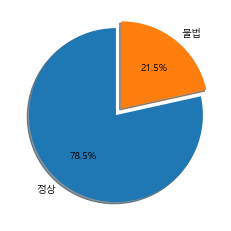

In [22]:
y1_legend = ['정상','불법']
explode = (0, 0.1)
plt.pie(y1_count, labels=y1_legend, autopct ='%0.1f%%', explode=explode, shadow=True, startangle=90)
plt.show()

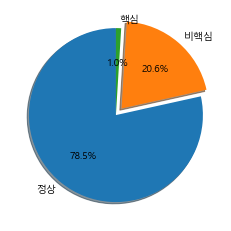

In [23]:
y2_legend = ['정상','비핵심','핵심']
explode = (0, 0.1, 0)
plt.pie(y2_count, labels=y2_legend, autopct ='%0.1f%%', explode=explode, shadow=True, startangle=90)
plt.show()

In [24]:
df.head()

,신고일자,신고세관부호,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,운송수단유형코드,신고인부호,수입자,해외거래처부호,특송업체부호,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,2020-10-08,67,B,11,21,11,40,SPUZ923,SZPFZPG,A70MDRN,NaN,3920100000,CN,CN,3.9,FCN1,B,18250.0,698975.00,1,1
1,2020-12-04,21,B,11,21,11,10,ZQJIYI3,OPXBPE0,NPKQ6XY,NaN,901110000,CO,CO,2.0,A,Y,1.5,914.85,0,0
2,2020-08-10,20,B,11,21,19,10,K3E28IQ,X150A5P,1PIC948,NaN,9504209000,CN,CN,0.0,FCN1,B,361.0,525579.90,1,1
3,2021-03-01,21,B,11,21,11,40,DWNJQL8,XH34UUD,F5CZ7VJ,NaN,6208921000,CN,CN,13.0,A,E,60.0,4956.00,0,0
4,2020-05-15,40,B,90,21,15,40,NZYZ967,TTG1FPO,23QQBAY,MWIDNS,8525803000,HK,CN,0.0,CIT,Y,110.0,50127.00,1,1


In [25]:
df.tail()

,신고일자,신고세관부호,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,운송수단유형코드,신고인부호,수입자,해외거래처부호,특송업체부호,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액,우범여부,핵심적발
2995,2020-11-16,40,B,11,21,15,39,AY5N2KW,XDYN7O6,XZ2KCQE,NaN,8542321030,SG,US,0.0,CIT,B,4.9,126532.21,0,0
2996,2020-05-18,31,B,10,21,11,9,DWNJQL8,1SA12D8,7E9SOBM,NaN,303390000,GN,GN,10.0,A,Y,2821.5,1308611.70,0,0
2997,2020-01-23,41,B,10,21,11,38,DB9B0VN,VCARM98,249LO7A,NaN,9507901000,CN,CN,8.0,A,S,10.6,136.74,0,0
2998,2020-06-23,41,B,10,21,11,9,GUBK2FH,BOG5KQL,TXBQLS6,MWIDNS,307522000,CN,CN,0.0,FCN6,G,2004.3,3954483.90,0,0
2999,2020-08-08,40,B,10,21,11,9,69RSNY6,VOITGCZ,WM5DCNO,NaN,703101000,CN,CN,135.0,W2,S,24000.0,2272800.00,0,0


In [26]:
df['신고일자']=df['신고일자'].astype(str)
df['신고일자']=pd.to_datetime(df['신고일자'])
# df['신고일자']=df['신고일자'].astype(str)

In [27]:
df=df.sort_values('신고일자',axis=0, ascending =True, inplace=False)

In [28]:
df

,신고일자,신고세관부호,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,운송수단유형코드,신고인부호,수입자,해외거래처부호,특송업체부호,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액,우범여부,핵심적발
185,2020-01-01,32,B,88,12,11,10,CDO1QN6,QD86XU7,8QOEWI1,NaN,9503003700,CN,CN,8.0,A,G,2.3,18.17,1,1
2464,2020-01-01,29,B,12,21,11,40,K3E28IQ,MEDCNNU,DSDYKO2,NaN,3926909000,CN,CN,6.5,C,B,2.0,1.20,0,0
2251,2020-01-01,40,B,10,21,40,39,00RURK1,92X3AXX,M7J7I9L,W6UCD9,7318190000,CN,CN,8.0,A,B,2.0,190.80,0,0
1945,2020-01-01,14,B,97,21,10,10,1XCM1XF,XE08QFH,3VEFA3W,NaN,3926909000,CN,CN,6.5,C,B,40.0,24.00,0,0
2590,2020-01-01,42,B,11,21,11,39,6V8QPPW,LD8GM65,NaN,NaN,7102390000,CN,HK,5.0,A,G,0.0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,2021-06-30,30,B,11,21,11,9,QM7LO7M,LKVEEMK,T5E1HFY,MWIDNS,8518109090,DE,DE,0.0,FEU1,G,128.0,22707.20,1,1
969,2021-06-30,12,B,11,21,11,41,DO8IOFX,RALHUGK,0HC870L,NaN,7326909000,HK,CN,8.0,A,G,4.0,6.00,0,0
2965,2021-06-30,39,B,11,21,11,40,9O034UC,ML9KFEZ,KQJSMZA,SS12NI,8517629000,US,TW,0.0,CIT,G,1.6,2188.64,0,0
1015,2021-06-30,40,B,12,21,11,10,FXK30O6,YIIADKE,M22FR6T,NaN,9503003919,CN,CN,4.8,FCN1,G,1365.0,91318.50,0,0


In [29]:
df['신고일자'] = pd.to_datetime(df['신고일자'])
df = df.set_index(df['신고일자'])
df = df.sort_index()

In [30]:
train = df['2020-01-01':'2020-12-31']
train = train.reset_index(drop=True)
train

,신고일자,신고세관부호,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,운송수단유형코드,신고인부호,수입자,해외거래처부호,특송업체부호,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,2020-01-01,32,B,88,12,11,10,CDO1QN6,QD86XU7,8QOEWI1,NaN,9503003700,CN,CN,8.0,A,G,2.3,18.17,1,1
1,2020-01-01,29,B,12,21,11,40,K3E28IQ,MEDCNNU,DSDYKO2,NaN,3926909000,CN,CN,6.5,C,B,2.0,1.20,0,0
2,2020-01-01,40,B,10,21,40,39,00RURK1,92X3AXX,M7J7I9L,W6UCD9,7318190000,CN,CN,8.0,A,B,2.0,190.80,0,0
3,2020-01-01,14,B,97,21,10,10,1XCM1XF,XE08QFH,3VEFA3W,NaN,3926909000,CN,CN,6.5,C,B,40.0,24.00,0,0
4,2020-01-01,42,B,11,21,11,39,6V8QPPW,LD8GM65,NaN,NaN,7102390000,CN,HK,5.0,A,G,0.0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36588,2020-12-31,40,B,10,21,11,40,DB7JDWC,GVK70MT,GTTZC39,NaN,8473302000,US,US,0.0,FUS1,E,1.3,3363.36,0,0
36589,2020-12-31,20,B,11,21,11,10,DGIRSXL,BMH6J4M,EFJRRSH,MWIDNS,7318152000,CN,CN,0.0,FCN1,B,9225.2,20295.44,0,0
36590,2020-12-31,20,B,10,21,11,10,Q9ZG6R5,NAUQTEB,RR98MHK,NaN,8419200000,LU,FR,0.0,C,E,45.0,165370.50,0,0
36591,2020-12-31,40,B,11,21,11,10,4OSUO77,MIBBA9T,GC9JAOX,NaN,9109900000,CN,CN,0.0,FCN1,G,65.4,210627.24,0,0


In [31]:
valid = df['2021-01-01':'2021-03-31']
valid = valid.reset_index(drop=True)
valid

,신고일자,신고세관부호,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,운송수단유형코드,신고인부호,수입자,해외거래처부호,특송업체부호,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,2021-01-01,13,B,11,21,11,10,L77JJEG,HQ0W7JA,PBP2MYI,MWIDNS,8407210000,JP,JP,8.0,A,B,1262.0,1437418.00,0,0
1,2021-01-01,20,B,11,21,11,40,749ECRU,Y2FJ95S,K8NWCLE,NaN,8479909070,CN,DE,8.0,A,S,10880.0,14163584.00,0,0
2,2021-01-01,19,B,11,21,11,9,OZB7KED,446O4EE,7PN0VA5,NaN,6211111000,HK,IT,13.0,A,E,1.5,5142.15,0,0
3,2021-01-01,31,B,88,21,11,40,SM89FYN,OOWNJY9,KMLET96,NaN,8207191000,CN,CN,8.0,A,E,57.0,63372.60,1,1
4,2021-01-01,20,B,10,21,11,39,DM8H44I,MU3B4MR,LMBSLAF,W6UCD9,3304999000,JP,JP,6.5,C,G,0.4,107.08,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8475,2021-03-31,39,B,11,21,11,10,6D4DNS7,8TW53B3,5JEUXPV,MWIDNS,6907210000,CN,CN,8.0,A,G,1219.0,8167.30,0,0
8476,2021-03-31,40,B,11,21,12,10,3BTA0QN,USP5TV1,23RIU88,NaN,4911100000,EE,PE,0.0,A,Y,0.2,0.14,1,1
8477,2021-03-31,13,B,11,21,41,40,NULLLLS,XE08QFH,6ZQTY16,NaN,8530900000,DE,FR,0.0,FEU1,G,1.0,3268.50,1,1
8478,2021-03-31,41,B,10,21,10,10,KWSE1HX,JUJJ961,NaN,NaN,1207400000,CN,CN,0.0,FCN6,E,54000.0,39447000.00,0,0


In [32]:
test = df['2021-04-01':'2021-06-30']
test = test.reset_index(drop=True)
test

,신고일자,신고세관부호,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,운송수단유형코드,신고인부호,수입자,해외거래처부호,특송업체부호,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,2021-04-01,29,B,91,21,11,41,575N8BW,PEJWA0Y,30SKLHE,NaN,8481201000,CN,CN,2.4,FCN1,Y,623.0,303587.90,1,1
1,2021-04-01,21,B,10,21,11,40,8ZM6GUW,9DIRDSY,64D20EU,NaN,4407299000,VN,VN,0.0,FVN2,S,23078.0,2734743.00,0,0
2,2021-04-01,39,B,12,21,10,9,1XCM1XF,SRCDUMH,7PN0VA5,NaN,710807000,CN,CN,27.0,C,E,60000.0,15912000.00,0,0
3,2021-04-01,15,B,11,21,11,10,KEGR4JZ,XSK62NY,EIXGWGQ,NaN,4202999000,VN,VN,8.0,A,B,10.0,97.00,1,1
4,2021-04-01,30,B,88,21,19,39,607KRHF,DRMMKS4,FVMLD76,NaN,8711301000,TH,TH,8.0,A,Y,195.0,580242.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8922,2021-06-30,30,B,11,21,11,9,QM7LO7M,LKVEEMK,T5E1HFY,MWIDNS,8518109090,DE,DE,0.0,FEU1,G,128.0,22707.20,1,1
8923,2021-06-30,12,B,11,21,11,41,DO8IOFX,RALHUGK,0HC870L,NaN,7326909000,HK,CN,8.0,A,G,4.0,6.00,0,0
8924,2021-06-30,39,B,11,21,11,40,9O034UC,ML9KFEZ,KQJSMZA,SS12NI,8517629000,US,TW,0.0,CIT,G,1.6,2188.64,0,0
8925,2021-06-30,40,B,12,21,11,10,FXK30O6,YIIADKE,M22FR6T,NaN,9503003919,CN,CN,4.8,FCN1,G,1365.0,91318.50,0,0


In [33]:
df = df.reset_index(drop=True)
df

,신고일자,신고세관부호,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,운송수단유형코드,신고인부호,수입자,해외거래처부호,특송업체부호,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,2020-01-01,32,B,88,12,11,10,CDO1QN6,QD86XU7,8QOEWI1,NaN,9503003700,CN,CN,8.0,A,G,2.3,18.17,1,1
1,2020-01-01,29,B,12,21,11,40,K3E28IQ,MEDCNNU,DSDYKO2,NaN,3926909000,CN,CN,6.5,C,B,2.0,1.20,0,0
2,2020-01-01,40,B,10,21,40,39,00RURK1,92X3AXX,M7J7I9L,W6UCD9,7318190000,CN,CN,8.0,A,B,2.0,190.80,0,0
3,2020-01-01,14,B,97,21,10,10,1XCM1XF,XE08QFH,3VEFA3W,NaN,3926909000,CN,CN,6.5,C,B,40.0,24.00,0,0
4,2020-01-01,42,B,11,21,11,39,6V8QPPW,LD8GM65,NaN,NaN,7102390000,CN,HK,5.0,A,G,0.0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,2021-06-30,30,B,11,21,11,9,QM7LO7M,LKVEEMK,T5E1HFY,MWIDNS,8518109090,DE,DE,0.0,FEU1,G,128.0,22707.20,1,1
53996,2021-06-30,12,B,11,21,11,41,DO8IOFX,RALHUGK,0HC870L,NaN,7326909000,HK,CN,8.0,A,G,4.0,6.00,0,0
53997,2021-06-30,39,B,11,21,11,40,9O034UC,ML9KFEZ,KQJSMZA,SS12NI,8517629000,US,TW,0.0,CIT,G,1.6,2188.64,0,0
53998,2021-06-30,40,B,12,21,11,10,FXK30O6,YIIADKE,M22FR6T,NaN,9503003919,CN,CN,4.8,FCN1,G,1365.0,91318.50,0,0


In [34]:
df.columns

Index(['신고일자', '신고세관부호', '수입신고구분코드', '수입거래구분코드', '수입종류코드', '징수형태코드', '운송수단유형코드', '신고인부호', '수입자', '해외거래처부호', '특송업체부호', 'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율', '관세율구분코드', '원산지표시유무코드', '신고중량(KG)', '과세가격원화금액', '우범여부', '핵심적발'], dtype='object')

In [35]:
df.to_csv('./result_syn/df_syn.csv', index=False, encoding='utf-8')

In [36]:
train.to_csv('./result_syn/df_syn_train.csv', index=False, encoding='utf-8-sig')

In [37]:
valid.to_csv('./result_syn/df_syn_valid.csv', index=False, encoding='utf-8-sig')

In [38]:
test.to_csv('./result_syn/df_syn_test.csv', index=False, encoding='utf-8-sig')

In [39]:
train.shape

(36593, 21)

In [40]:
valid.shape

(8480, 21)

In [41]:
test.shape

(8927, 21)